In [1]:
include("../src/bmparticles.jl")
include("../src/bmtheory.jl")
using .BParts
using .Theorist

In [2]:
function randArenaEvolve(nCells::Int, steps::Int, growthParams::Union{Tuple, Nothing}=nothing; plotting=false, animating=false)
    
    arena = buildRandArena(Bounds((0.,10.), (0.,10.)), nCells, 0.08, 0.05, fixSpeed=false)
    
    arenaCellPositions_dim_id = BParts.cellPositions_DIM_ID(arena)

    eKin = BParts.kineticEnergy(arena)
    println("::::: Initial total kinetic energy: ", eKin)

    if animating
        anim = Animation()
    else anim = nothing
    end
    
    posTime_t_dim_id, velTime_t_dim_id, cells_T_ID = 
        evolveArena!(arena, steps, growthParams, plotsteps=plotting, animator=anim)
    
    if animating
        gif(anim, "figures/animation.gif", fps=10)
    end

    eKin = BParts.kineticEnergy(arena)
    println("::::: Final total kinetic energy: ", eKin)

    return arena, posTime_t_dim_id, velTime_t_dim_id, cells_T_ID
end

randArenaEvolve (generic function with 2 methods)

In [3]:
logisticRate(n::Real, ρ::Real, k::Real) = n*ρ*(1-n/k)
exponentialRate(n::Real, ρ::Real) = n*ρ

nCells = 50
evolveTime = 300
ρ = 0.06
k = 400
radius = 0.08
vStd = 0.05

growthParams = (n->logisticRate(n, ρ, k), radius, vStd)
arena, posTime_t_dim_id, velTime_t_dim_id, cells_T_ID = randArenaEvolve(nCells, evolveTime, growthParams);

::::: Initial total kinetic energy: 0.11879713115909961


Progress:  53%|█████████████████████▋                   |  ETA: 0:00:02

anomalous collision time 2.0510256251085104 found in step time 1
A position: 

Progress:  64%|██████████████████████████▍              |  ETA: 0:00:01

[7.246353113609824, 3.1271453487690897]; A speed: 0.09055501143308575
B position: [7.404251420008764, 3.1012972378836445]; B speed: 0.08871895781612735
anomalous collision time 2.2716743414415816 found in step time 1
A position: [7.096462625597896, 3.0782934890680345]; A speed: 0.07420428720892815
B position: [7.169928584381036, 2.93615710069379]; B speed: 0.08623950439522865


Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


::::: Final total kinetic energy: 0.5562971311590995


In [4]:
using Plots
gr()

Plots.GRBackend()

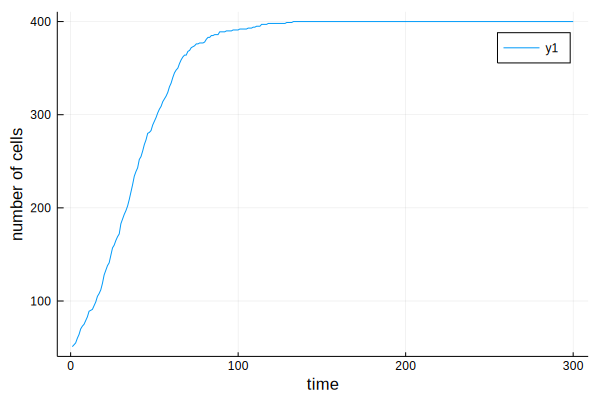

In [5]:
p2 = plot(map(length, cells_T_ID))
xlabel!("time")
ylabel!("number of cells")
display(p2)

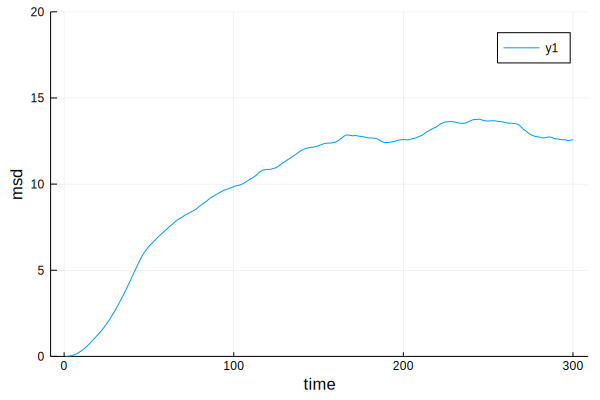

In [6]:
msd_t = BParts.meanSquaredDisplacement(posTime_t_dim_id[:,:,:], arena.bounds);
p = plot(msd_t)
ylims!((0,20))
xlabel!("time")
ylabel!("msd")
display(p)